In [8]:
#https://neuralprophet.com/html/trend_peyton_manning.html
#https://neuralprophet.com/html/hyperparameter-selection.html

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")
import plotly.express as px
import plotly.graph_objects as go

## load data

In [14]:
import pandas as pd
#data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv( "C:/Users/hotaha/OneDrive - dormakaba Group/Desktop/Python/Data/BTC-USD.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-16,5687.569824,5776.229980,5544.209961,5725.589844,5725.589844,2008070016
1,2017-10-17,5741.580078,5800.350098,5472.720215,5605.509766,5605.509766,1821570048
2,2017-10-18,5603.819824,5603.819824,5151.439941,5590.689941,5590.689941,2399269888
3,2017-10-19,5583.740234,5744.350098,5531.060059,5708.520020,5708.520020,1780540032
4,2017-10-20,5708.109863,6060.109863,5627.229980,6011.450195,6011.450195,2354429952
5,2017-10-21,5996.790039,6194.879883,5965.069824,6031.600098,6031.600098,2207099904
6,2017-10-22,6036.660156,6076.259766,5792.339844,6008.419922,6008.419922,2034630016
7,2017-10-23,6006.000000,6075.589844,5732.470215,5930.319824,5930.319824,2401840128
8,2017-10-24,5935.520020,5935.520020,5504.180176,5526.640137,5526.640137,2735699968
9,2017-10-25,5524.600098,5754.330078,5397.879883,5750.799805,5750.799805,1966989952


In [16]:
df=df.rename(columns={"Date": "ds", "Close": "y"})
df

,ds,Open,High,Low,y,Adj Close,Volume
0,2017-10-16,5687.569824,5776.229980,5544.209961,5725.589844,5725.589844,2008070016
1,2017-10-17,5741.580078,5800.350098,5472.720215,5605.509766,5605.509766,1821570048
2,2017-10-18,5603.819824,5603.819824,5151.439941,5590.689941,5590.689941,2399269888
3,2017-10-19,5583.740234,5744.350098,5531.060059,5708.520020,5708.520020,1780540032
4,2017-10-20,5708.109863,6060.109863,5627.229980,6011.450195,6011.450195,2354429952
...,...,...,...,...,...,...,...
1822,2022-10-12,19052.646484,19203.199219,19029.757813,19157.445313,19157.445313,24950173846
1823,2022-10-13,19156.966797,19453.328125,18319.822266,19382.904297,19382.904297,44219840004
1824,2022-10-14,19382.533203,19889.146484,19115.408203,19185.656250,19185.656250,38452356727
1825,2022-10-15,19185.437500,19212.541016,19019.250000,19067.634766,19067.634766,16192235532


In [17]:
df=df.drop(['Open','High','Low','Volume','Adj Close'], axis=1)
df

,ds,y
0,2017-10-16,5725.589844
1,2017-10-17,5605.509766
2,2017-10-18,5590.689941
3,2017-10-19,5708.520020
4,2017-10-20,6011.450195
...,...,...
1822,2022-10-12,19157.445313
1823,2022-10-13,19382.904297
1824,2022-10-14,19185.656250
1825,2022-10-15,19067.634766


In [26]:
m = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    #changepoints=None, # list of dates that may include change points (None -> automatic )
    #n_changepoints=5,
    changepoints_range=0.95,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    #n_forecasts=7,
    n_lags=7,
    batch_size=32,
    num_hidden_layers=2,
    d_hidden=4,     # Dimension of hidden layers of AR-Net
    ar_sparsity=None,  # Sparcity in the AR coefficients
    learning_rate=None,
    epochs=100,
    loss_func="Huber",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
    #log_level=None, # Determines the logging level of the logger object
)

In [19]:
#df_train, df_test = m.split_df(df, valid_p=0.2)

In [27]:
#m = NeuralProphet()
metrics = m.fit(df, freq="D")
metrics.head(10)

  0%|          | 0/263 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.926307,71581.331327,87310.819797,0.0
1,0.815171,65335.826794,80090.483242,0.0
2,0.685677,57833.490771,71524.311710,0.0
3,0.520961,48068.969282,59901.822115,0.0
4,0.316159,34945.541071,44220.722588,0.0
5,0.130166,21123.849283,26784.369621,0.0
6,0.026361,9425.221504,11740.446169,0.0
7,0.003340,3235.891326,4121.897859,0.0
8,0.001096,1914.896106,2454.585308,0.0
9,0.000692,1502.366852,1940.377819,0.0


In [28]:
future = m.make_future_dataframe(df, periods=365, n_historic_predictions=True)
future.tail(3)
forecast = m.predict(future)
print(list(forecast.columns))
forecast

['ds', 'y', 'yhat1', 'residual1', 'ar1', 'trend', 'season_yearly', 'season_weekly']


,ds,y,yhat1,residual1,ar1,trend,season_yearly,season_weekly
0,2017-10-16,5725.589844,None,None,None,None,None,None
1,2017-10-17,5605.509766,None,None,None,None,None,None
2,2017-10-18,5590.689941,None,None,None,None,None,None
3,2017-10-19,5708.520020,None,None,None,None,None,None
4,2017-10-20,6011.450195,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
1823,2022-10-13,19382.904297,19264.773438,-118.13086,-43498.507812,62633.011719,200.443619,-70.174347
1824,2022-10-14,19185.656250,19562.228516,376.572266,-43281.347656,62630.347656,214.307892,-1.078136
1825,2022-10-15,19067.634766,19469.65625,402.021484,-43403.488281,62627.675781,227.162811,18.306952
1826,2022-10-16,19129.611328,19346.300781,216.689453,-43511.730469,62625.011719,238.964401,-5.944304


## plot the graph

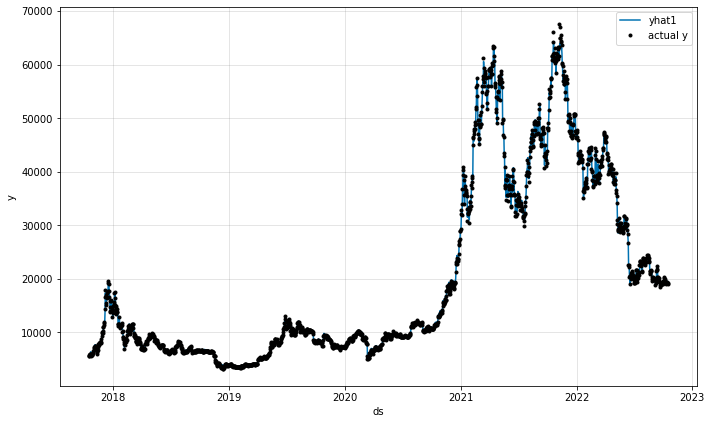

In [29]:
# plots the model predictions
fig1 = m.plot(forecast)

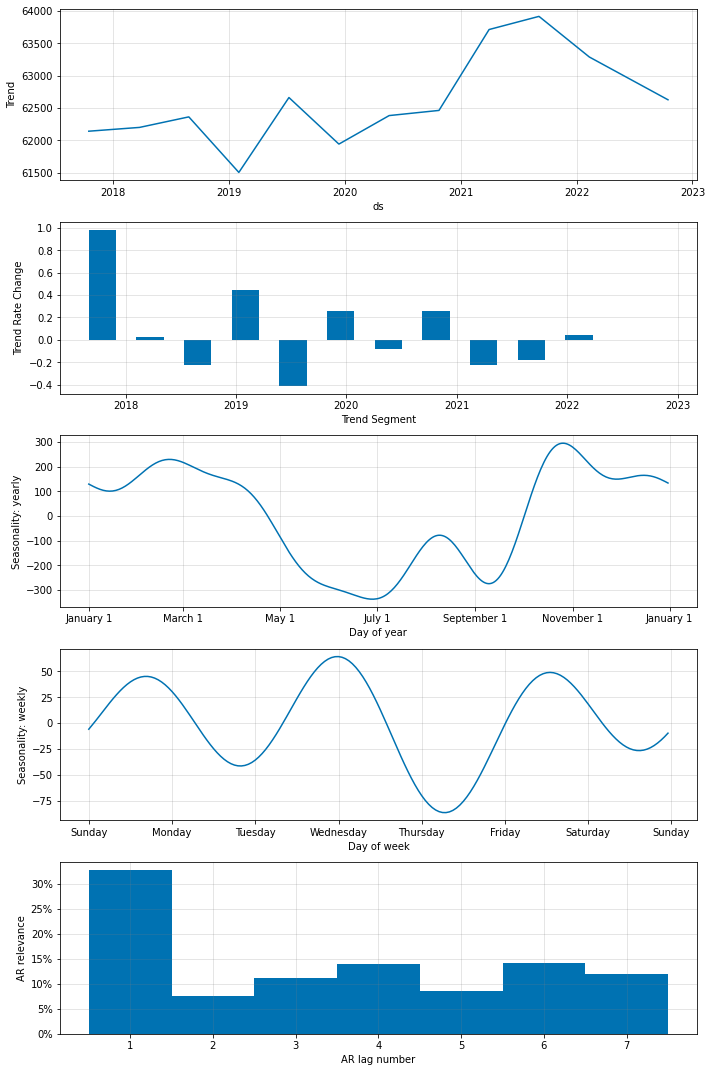

In [30]:
# visualizes the model parameters.
fig2 = m.plot_parameters()

In [38]:
fig = go.Figure()

fig.add_scatter( x=metrics.index, y=metrics['RMSE'], mode='lines', name="RMSE")
fig.add_scatter( x=metrics.index, y=metrics['MAE'], mode='lines', name="MAE")

fig.update_layout(
    
    yaxis_title='Error',
    title='Bitcoin',
    hovermode="x")
#fig.add_hline(y=957)
fig.show()

In [36]:
fig = go.Figure()

fig.add_scatter( x=df['ds'], y=df['y'], mode='lines', name="original")
fig.add_scatter( x=forecast['ds'], y=forecast['yhat1'], mode='lines', name="prediction")

fig.update_layout(
    
    yaxis_title='Price',
    title='Bitcoin',
    hovermode="x")
#fig.add_hline(y=957)
fig.show()

## save the model

In [ ]:
with open('neuralprophet_model.pkl', "wb") as f:
    pickle.dump(m, f)